# Heart Disease Prediction 

In [ ]:
Objective: 
 Build a model to predict whether a person is at risk of heart disease based on their health data. 
Dataset: 
 Heart Disease UCI Dataset (available on Kaggle) 
Method statement: 
● Clean the dataset (handle missing values if any). 
● Perform Exploratory Data Analysis (EDA) to understand trends. 
● Train a classification model (Logistic Regression or Decision Tree). 
● Evaluate using metrics: accuracy, ROC curve, and confusion matrix. 
● Highlight important features affecting prediction. 

In [1]:
import kagglehub

# Downloading the dataset
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\K19EL42\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


In [2]:
import os
os.listdir(path)

['heart.csv']

In [3]:
import pandas as pd
df = pd.read_csv(os.path.join(path, "heart.csv"))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.unique()

array([0, 1], dtype=int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum() #Checking any null datapoints in dataset, all zeroes show there arent any null in dataset.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis (EDA)

<AxesSubplot:>

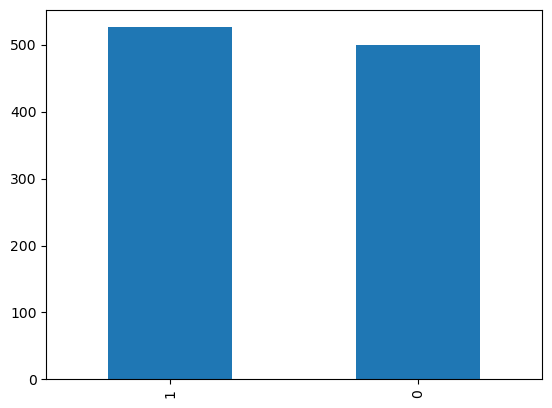

In [10]:
df['target'].value_counts().plot(kind='bar') #Both classes/categories are almost balanced 

In [11]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [14]:
categorical_cols = [] #identifying categorical columns
for col in df.columns:
    if df[col].nunique()<=10: #features having less than 10 categories we'll consider them categorical
        categorical_cols.append(col)
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

1    713
0    312
Name: sex, dtype: int64

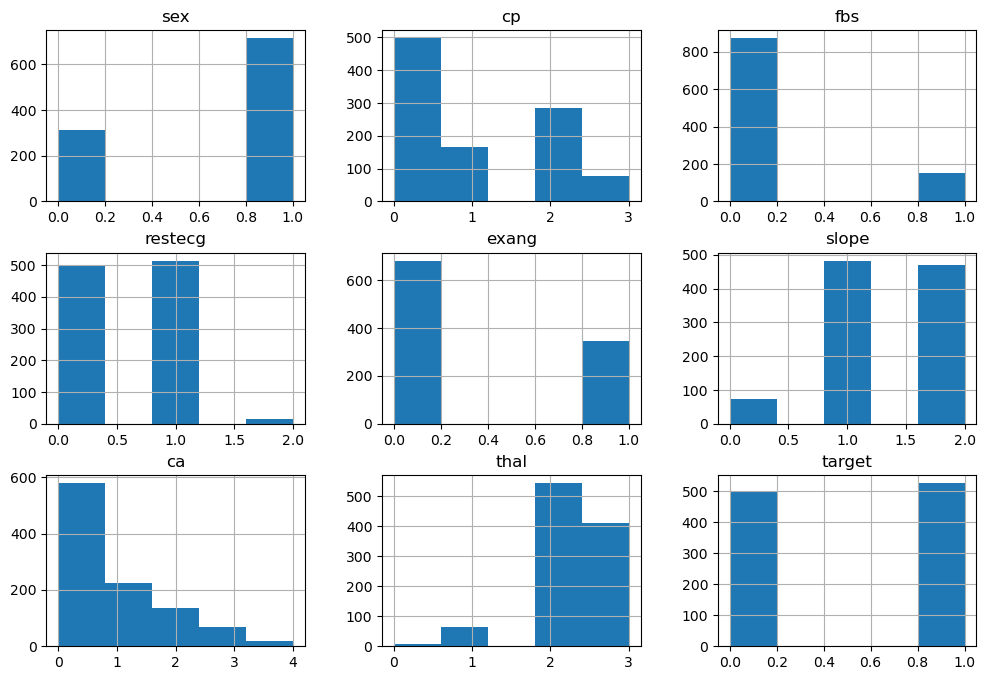

In [16]:
df[categorical_cols].hist(bins=5, figsize=(12,8)) #data distribution of each feature

df.sex.value_counts()

In [17]:
cols = df.columns

<AxesSubplot:>

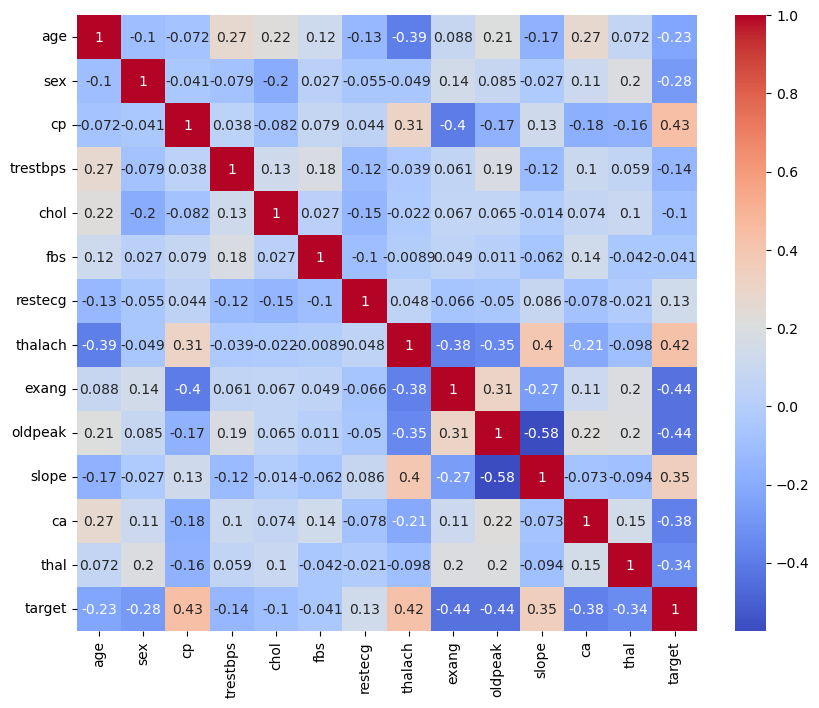

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')

#Heatmap tells which features matter most in decision of target value 0 or 1. +/dark red show strong & direct relation 
#of feature with the target & other features and -values/dark blue show the inverse relation.

<AxesSubplot:xlabel='age', ylabel='Count'>

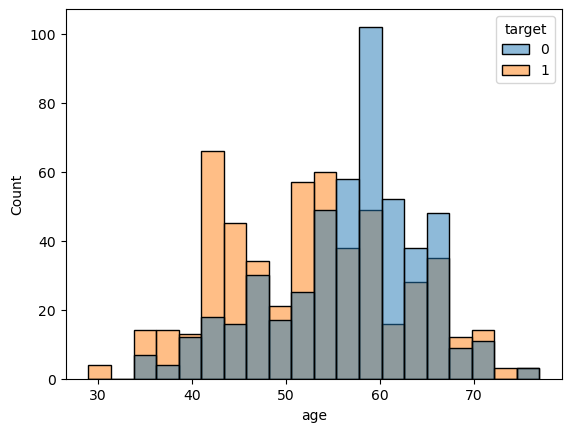

In [23]:
sns.histplot(data=df, x='age', hue='target', bins=20) #Plotting Age Vs Disease distribution of dataset

In [24]:
df.groupby('sex')['target'].value_counts() #computes the value of the target for each category in sex feature
#226 of females in this dataset have heart disease
#300 of males in this dataset have heart disease

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:title={'center':'1 = male; 0 = female'}, xlabel='sex,target'>

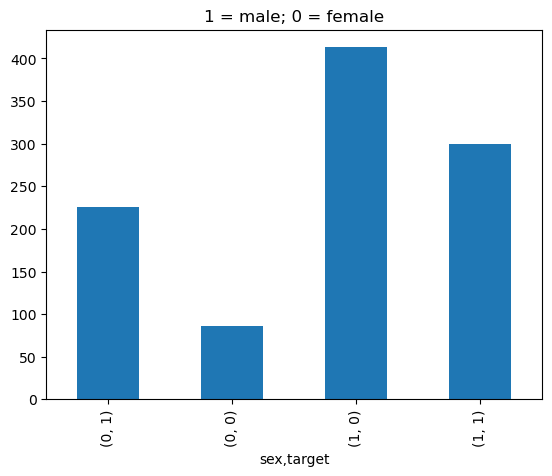

In [25]:
df.groupby('sex')['target'].value_counts().plot(kind='bar', title='1 = male; 0 = female')

<AxesSubplot:xlabel='age', ylabel='thalach'>

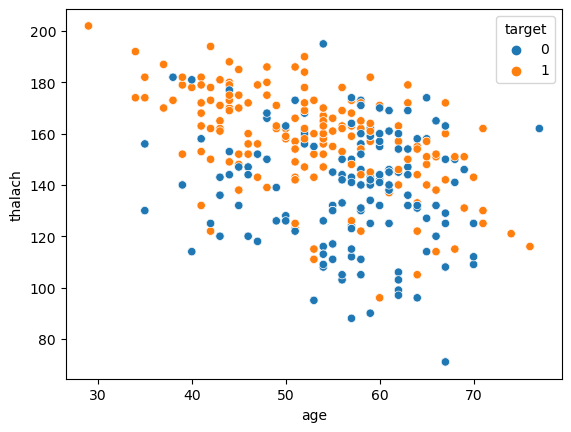

In [27]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target') #plotting Heart rate vs age
#This shows the people with disease have typically higher heart rates(orange marked are people having disease)

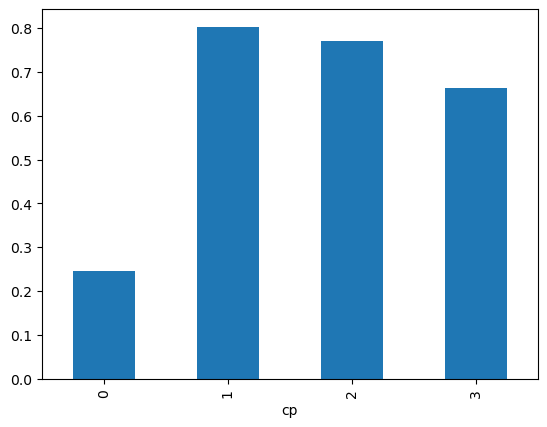

In [28]:
df.groupby('cp')['target'].mean().plot(kind='bar') #Chest pain type vs target
plt.show()
#Type Chest pain is the import feature for decision of disease presence

In [29]:
df.sex.unique() #(1 = male; 0 = female)

array([1, 0], dtype=int64)

<AxesSubplot:>

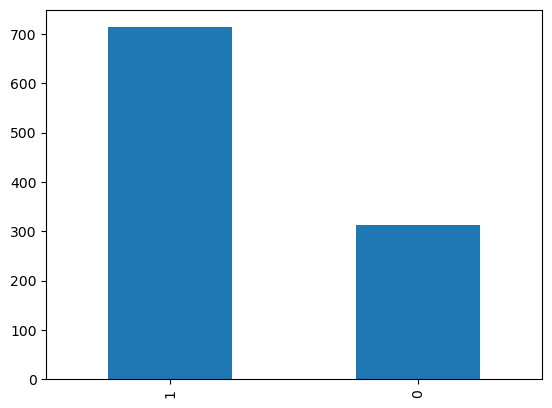

In [30]:
df.sex.value_counts().plot(kind='bar')

# Data Processing

In [33]:
#Separating categorical and numerical columns
cat_cols = []
num_cols = []
for col in df.columns:
    if df[col].nunique() <=10:
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [34]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [35]:
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [36]:
df.cp.unique() #We'll have to encode these categories so that models dont consider them as a numeric order

array([0, 1, 2, 3], dtype=int64)

In [37]:
df2 = df.copy()

In [38]:
#Encoding of Categorical Data
#Encoding is required to make models avoid considering the unique values in columns in a numerical order
df2 = pd.get_dummies(df, columns=cat_cols, drop_first=True) #Droping 1st column to avoid Multicolinearity/Dummy variable trape

In [39]:
df2.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,125,212,168,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,53,140,203,155,3.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,70,145,174,125,2.6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61,148,203,161,0.0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,62,138,294,106,1.9,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [40]:
#Feature Scaling
#the distance based models like logistic Regression need data on the same scaling 
from sklearn.preprocessing import StandardScaler

In [41]:
SC = StandardScaler()
df2[num_cols] = SC.fit_transform(df2[num_cols])

In [42]:
df2.head() #Now all the numerical features are on the same scale between -1 to +1

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


# Preparing Data for Training

In [43]:
df2.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3',
       'target_1'],
      dtype='object')

In [44]:
x = df2.drop('target_1', axis='columns')
y = df2['target_1']

In [45]:
x.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_1, dtype: uint8

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train.shape, x_test.shape, y_train.shape

((820, 22), (205, 22), (820,))

# Building & Training the Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [51]:
LR = LogisticRegression()

In [52]:
DT = DecisionTreeClassifier(max_depth=4)

In [53]:
LR.fit(x_train, y_train)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

# Model Evaluation

In [54]:
LR.score(x_test, y_test)

0.8195121951219512

In [55]:
DT.score(x_test, y_test)

0.8146341463414634

In [56]:
y_pre_lr = LR.predict(x_test)
y_pre_dt= DT.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [60]:
accuracy_score(y_test, y_pre_lr), accuracy_score(y_test, y_pre_dt)

(0.8195121951219512, 0.8146341463414634)

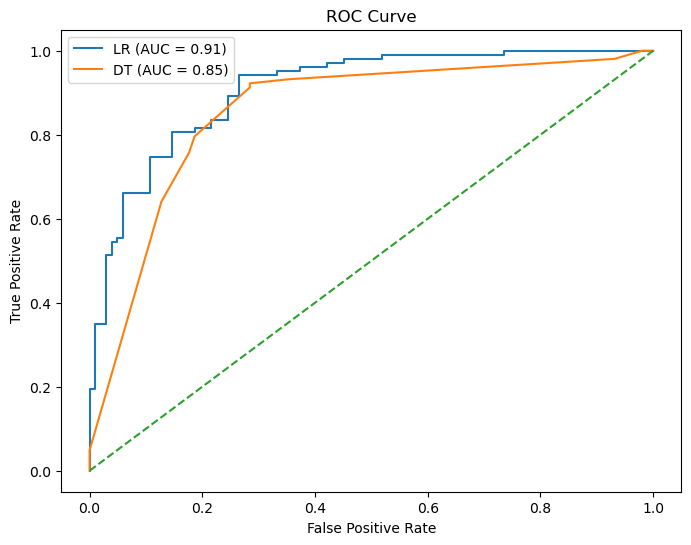

In [65]:
# Probabilities for positive class
y_prob_lr = LR.predict_proba(x_test)[:, 1]
y_prob_dt = DT.predict_proba(x_test)[:, 1]

# ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# AUC for ROC Curve
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"DT (AUC = {auc_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [66]:
cm_lr = confusion_matrix(y_test, y_pre_lr)

In [67]:
cm_lr

array([[76, 26],
       [11, 92]], dtype=int64)

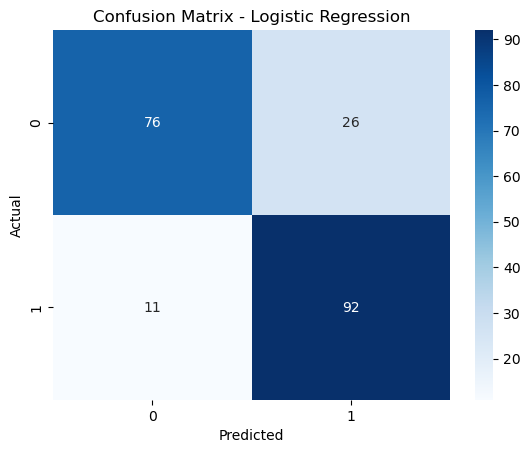

In [70]:
sns.heatmap(cm_lr, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
cm_dt = confusion_matrix(y_test, y_pre_dt)

In [72]:
cm_dt

array([[73, 29],
       [ 9, 94]], dtype=int64)

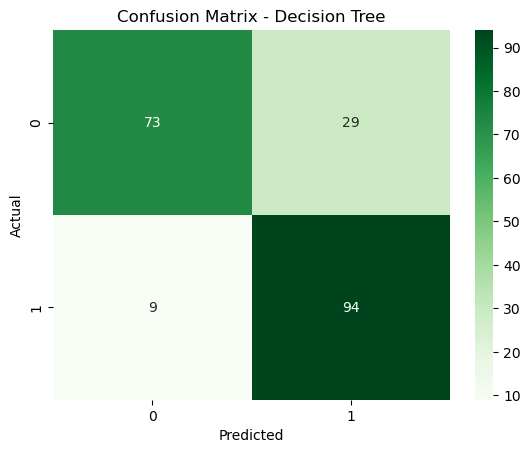

In [73]:
sns.heatmap(cm_dt, annot=True, cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Important Features 

In [76]:
important_features_lr = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': LR.coef_[0]
})
important_features_lr['abs_coeff'] = important_features_lr['coefficient'].abs()
important_features_lr = important_features_lr.sort_values(
    by='abs_coeff', ascending=False
)
important_features_lr
#-ve value shows the inverse relation with target and
#the value ex: 2.7 which is abs_coeff shows the strength of feature

,feature,coefficient,abs_coeff
16,ca_2,-2.749910,2.749910
8,cp_3,1.994983,1.994983
17,ca_3,-1.885681,1.885681
15,ca_1,-1.878149,1.878149
5,sex_1,-1.585749,1.585749
7,cp_2,1.483928,1.483928
6,cp_1,0.947967,0.947967
19,thal_1,0.839611,0.839611
21,thal_3,-0.765462,0.765462
13,slope_1,-0.724881,0.724881


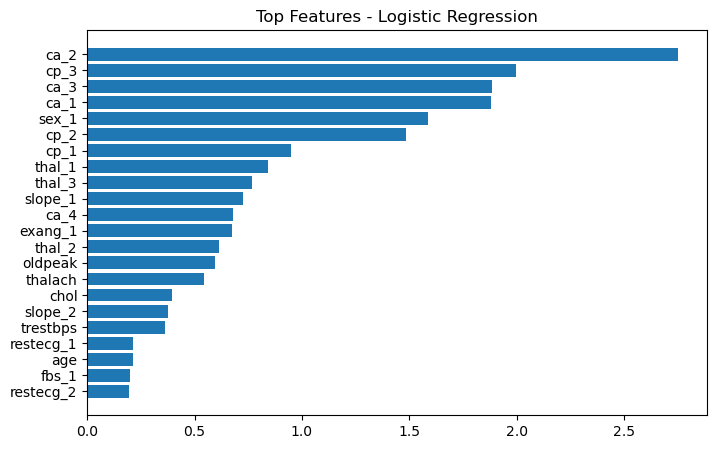

In [79]:
#Visualizing top features
top_lr = important_features_lr
plt.figure(figsize=(8, 5))
plt.barh(top_lr['feature'], top_lr['abs_coeff'])
plt.gca().invert_yaxis()
plt.title("Top Features - Logistic Regression")
plt.show()

In [ ]:
#Logistic Regression identifies chest pain type, sex, and thalassemia as the most influential predictors

# Explanation of results and final insights 

In [ ]:
>We applied Logistic Regression (LR) and Decision Tree (DT) models to predict heart disease using the Kaggle dataset. 
The Logistic Regression model achieved an accuracy of 81.9%, while the Decision Tree model reached 81.4%. These results 
indicate that both models are performing comparably, with LR slightly outperforming DT.

>The LR model’s strong performance suggests that the relationship between the features and the target is mostly linear and can
be effectively captured by a regression-based approach. The DT model, while slightly less accurate, provides a clear
hierarchical representation of feature importance, which can be useful for understanding key risk factors.